In [5]:
# importando as ferramentas necessarias 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# ======================================
#      ETAPA 1 – ENTENDER O NEGÓCIO
# ======================================

In [7]:
# Lendo os dadosImportar o dataset
df = pd.read_csv("..//Arquivo_csv/supermarket_sales.csv")

In [8]:
# Visualizar as primeiras linhas para conhecer os dados 
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [9]:
# Verificar se existem valores nulos no dataset
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [10]:
# Criar um agrupamento por filial e cidade (Branch, City) 
agrupar = df.groupby(["Branch", "City"])

# Calcular a média de satisfação (coluna "Rating") por filial
media_satisfacao = agrupar["Rating"].mean()

In [11]:
# Calcular o total de vendas (coluna "Total") por filial e cidade
vendas_totais = agrupar["Total"].sum()

In [12]:
# Calcular a renda bruta total (coluna "gross income") por filial e cidade
lucro_bruto = agrupar["gross income"].sum()

In [13]:
# Calcular a participação percentual de cada filial no total de vendas
total_geral = vendas_totais.sum()
participacao_percentual = (vendas_totais / total_geral) * 100

In [14]:
# Exibir a participação percentual das filiais
participacao_percentual


Branch  City     
A       Yangon       32.882757
B       Mandalay     32.881921
C       Naypyitaw    34.235322
Name: Total, dtype: float64

In [15]:
# calcular o total de vendas por categoria de produto (Product line)
produtos_total = df.groupby("Product line")["Total"].sum()

In [16]:
# Ordenar os produtos do mais vendido para o menos vendido
produtos_ordenados = produtos_total.sort_values(ascending=False)
produtos_ordenados


Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64

In [17]:
# ======================================
#    ETAPA 2 – DESEMPENHO FINANCEIRO
# ======================================


In [18]:
# Calcular a receita total (Total) por filial
totais_filial = df.groupby("Branch")["Total"].sum()

In [19]:
# Calcular o total geral da rede, somando todas as filiais
total_geral = totais_filial.sum()

In [20]:
# Exibir a receita total por filial
totais_filial

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64

In [21]:
# Contar o número de vendas por filial (cada linha = 1 venda)
numero_vendas = df.groupby("Branch")["Total"].count()

# Calcular o ticket médio por filial (receita total ÷ número de vendas)
ticket_medio = totais_filial / numero_vendas

# Exibir o ticket médio por filial
ticket_medio

Branch
A    312.354031
B    319.872506
C    337.099715
Name: Total, dtype: float64

In [22]:
# Indentificando o produto mais rentavel
rentavel = df.groupby("Product line")["gross income"].sum()
rentavel_ordenados = rentavel.sort_values(ascending=False)

# Exibir o mais rentável por produto
rentavel_ordenados

Product line
Food and beverages        2673.5640
Sports and travel         2624.8965
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Home and lifestyle        2564.8530
Health and beauty         2342.5590
Name: gross income, dtype: float64

In [23]:
# Calcular receita total (soma do Total) por método de pagamento
pagamentos = df.groupby("Payment")["Total"].sum()

# Exibir os métodos de pagamento
pagamentos


Payment
Cash           112206.570
Credit card    100767.072
Ewallet        109993.107
Name: Total, dtype: float64

In [24]:
# Contar número de vendas (transações) por método de pagamento
num_transacoes = df["Payment"].value_counts()
num_transacoes

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

In [25]:
# ======================================
#       ETAPA 3 – PADRÕES TEMPORAIS
# ======================================

In [26]:
# Converter a coluna "Date" para o formato de data (datetime)
df["Date"] = pd.to_datetime(df['Date'])
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1


In [27]:
# Criando novas colunas Dia Mes Ano e Semanas 

df = df.assign(
    Dia = df["Date"].dt.day,
    Mes = df["Date"].dt.month,
    Ano = df["Date"].dt.year,
    Semana = df["Date"].dt.isocalendar().week,
    Dia_Semana = df["Date"].dt.day_name()  # nome do dia para análise diária
)
df


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,Dia,Mes,Ano,Semana,Dia_Semana
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,1,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,10,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,9,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,4,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,6,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,...,Ewallet,40.35,4.761905,2.0175,6.2,29,1,2019,5,Tuesday
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,...,Ewallet,973.80,4.761905,48.6900,4.4,2,3,2019,9,Saturday
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,...,Cash,31.84,4.761905,1.5920,7.7,9,2,2019,6,Saturday
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,...,Cash,65.82,4.761905,3.2910,4.1,22,2,2019,8,Friday


In [28]:
# Cria uma coluna com o nome do mês
df["Nome_Mes"] = df["Date"].dt.strftime("%B")

# Agrupa por filial e nome do mês
vendas_mes = df.groupby(["Branch","Mes", "Nome_Mes" ])["Total"].sum()

vendas_mes

Branch  Mes  Nome_Mes
A       1    January     38681.1285
        2    February    29860.1205
        3    March       37659.1215
B       1    January     37176.0585
        2    February    34424.2710
        3    March       34597.3425
C       1    January     40434.6810
        2    February    32934.9825
        3    March       37199.0430
Name: Total, dtype: float64

In [29]:
#  Criar relatório de vendas por Semana
# # Agrupar por filial (Branch) e dia da semana, somando o total de vendas
vendas_semana = df.groupby(["Branch", "Semana"])["Total"].sum().reset_index()
vendas_semana

,Branch,Semana,Total
0,A,1,7433.5170
1,A,2,6926.3460
2,A,3,11407.3155
3,A,4,10217.6130
4,A,5,7345.5900
5,A,6,7612.7205
6,A,7,6972.8820
7,A,8,5536.8180
8,A,9,7188.6360
9,A,10,10524.1500


In [30]:
# Criar relatório de vendas por DIA
# Agrupar por filial (Branch) e data completa (Date), somando o total de vendas diárias
vendas_dia = df.groupby(["Branch", "Date"])["Total"].sum()
vendas_dia

Branch  Date      
A       2019-01-01    2371.3200
        2019-01-02     307.0515
        2019-01-03     937.4085
        2019-01-04     483.2625
        2019-01-05    2024.5050
                        ...    
C       2019-03-26     473.9700
        2019-03-27     943.2990
        2019-03-28     480.8055
        2019-03-29     985.6980
        2019-03-30    1441.9860
Name: Total, Length: 263, dtype: float64

In [31]:
# Transformando vendas_dia em um DF
vendas_dia = vendas_dia.reset_index()
vendas_dia

,Branch,Date,Total
0,A,2019-01-01,2371.3200
1,A,2019-01-02,307.0515
2,A,2019-01-03,937.4085
3,A,2019-01-04,483.2625
4,A,2019-01-05,2024.5050
...,...,...,...
258,C,2019-03-26,473.9700
259,C,2019-03-27,943.2990
260,C,2019-03-28,480.8055
261,C,2019-03-29,985.6980


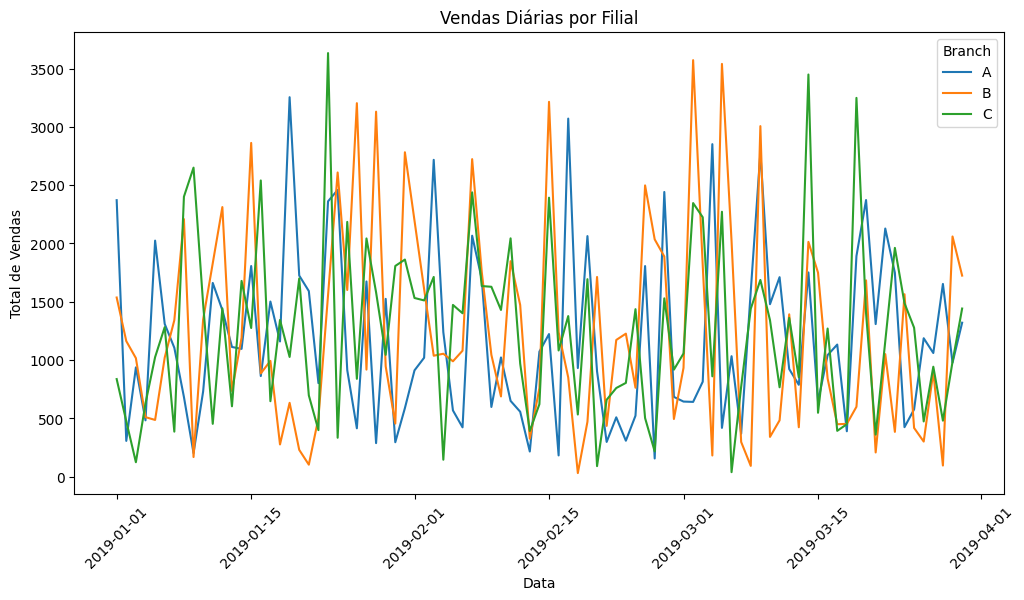

In [32]:
# Criando grafico de vendas diaria 

plt.figure(figsize=(12,6))
sns.lineplot(data=vendas_dia, x="Date", y="Total", hue="Branch")
plt.title("Vendas Diárias por Filial")
plt.xlabel("Data")
plt.ylabel("Total de Vendas")
plt.xticks(rotation=45)
plt.show()

C:\Users\welli\AppData\Local\Temp\ipykernel_11892\2402443939.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vendas_mes, x="Mes", y="Total", palette="viridis")


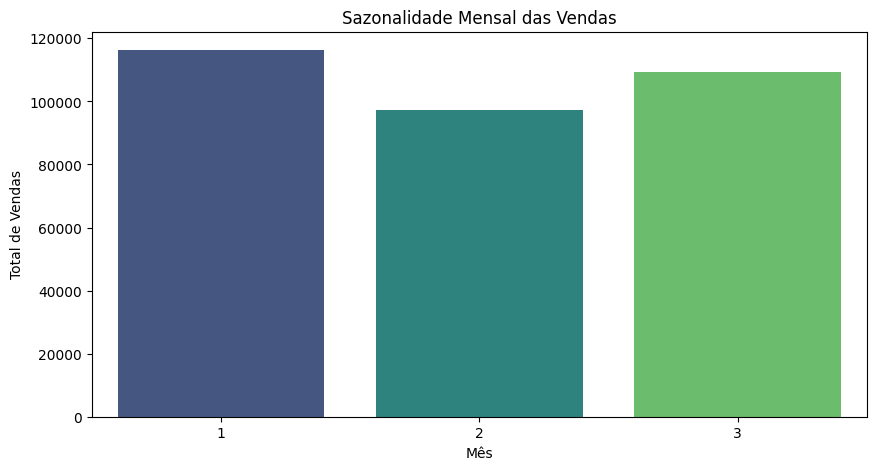

In [33]:

# Sazonalidade Mensal (com graficos)
vendas_mes = df.groupby(["Mes"])["Total"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=vendas_mes, x="Mes", y="Total", palette="viridis")
plt.title("Sazonalidade Mensal das Vendas")
plt.xlabel("Mês")
plt.ylabel("Total de Vendas")
plt.show()


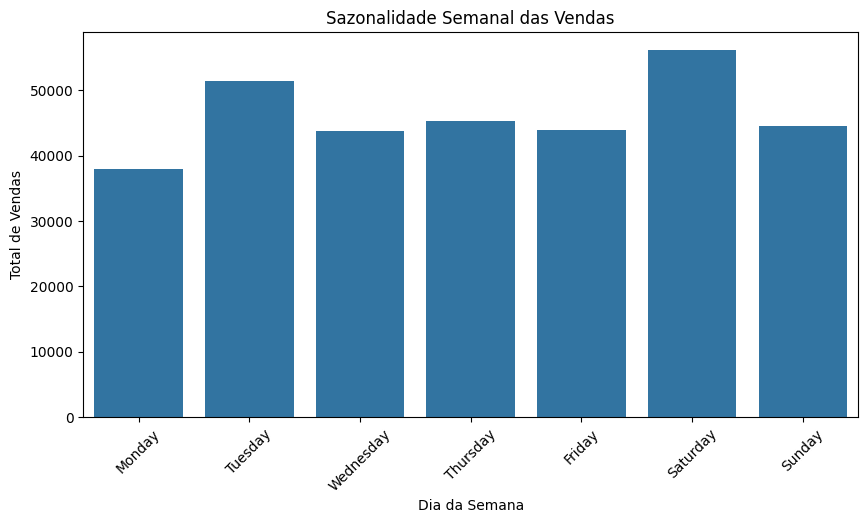

In [34]:
# Ordenando os dias 
dias_ordem = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Sazonalidade Semanal (com grafico)
vendas_semana = (
    df.groupby("Dia_Semana")["Total"]
      .sum()
      .reindex(dias_ordem)
      .reset_index()
)

plt.figure(figsize=(10,5))
sns.barplot(data=vendas_semana, x="Dia_Semana", y="Total")
plt.title("Sazonalidade Semanal das Vendas")
plt.xlabel("Dia da Semana")
plt.ylabel("Total de Vendas")
plt.xticks(rotation=45)
plt.show()

In [35]:
# garante que a coluna "Time" esteja como string sem espaços estranhos
df["Time"] = df["Time"].astype(str).str.strip()

# converte para tipo datetime 
df["Time_parsed"] = pd.to_datetime(df["Time"], format="%H:%M", errors="coerce")

# extrai a hora
df["Hour"] = df["Time_parsed"].dt.hour

In [36]:
# checar dtype
print(df["Time"].dtype)
print(df["Time_parsed"].dtype)

# ver valores que não viraram hora corretamente
df[df["Time_parsed"].isna()][["Time"]].head(10)

object
datetime64[ns]


,Time


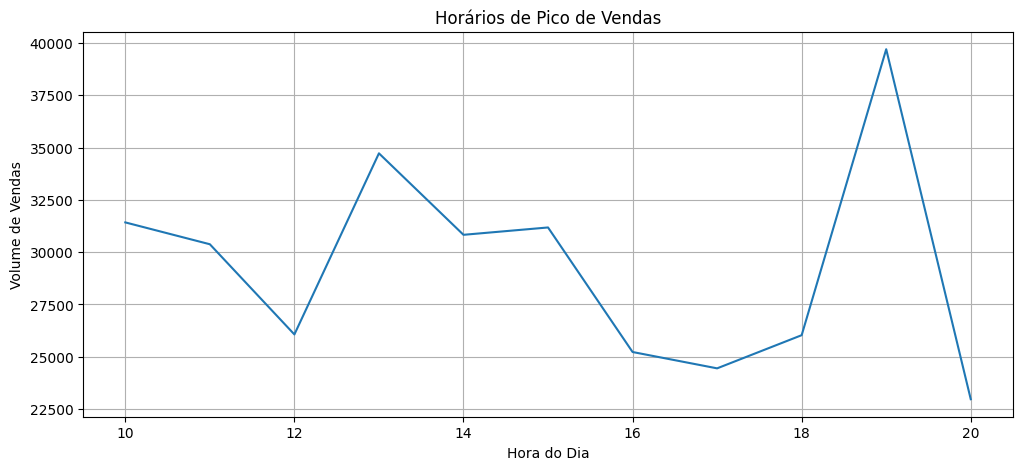

In [37]:
# agrupando vendas por horario

vendas_hora = df.groupby("Hour")["Total"].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=vendas_hora, x="Hour", y="Total")
plt.title("Horários de Pico de Vendas")
plt.xlabel("Hora do Dia")
plt.ylabel("Volume de Vendas")
plt.grid(True)
plt.show()

In [38]:
# indentificando vendas no horario de pico 
vendas_hora.loc[vendas_hora["Total"].idxmax()]

Hour        19.000
Total    39699.513
Name: 9, dtype: float64

In [39]:
# ======================================
#      ETAPA 4 – ENTENDER O Cliente
# ======================================